In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_red = pd.read_csv(r"D:/wine+quality/winequality-red.csv", sep=";")
df_white = pd.read_csv(r"D:/wine+quality/winequality-white.csv", sep=";")

print("Red shape")
print(df_red.shape)
display(df_red.head())

print("-------------------------------------------------------------------------")

print("White shape)")
print(df_white.shape)
display(df_white.head())


Red shape
(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


-------------------------------------------------------------------------
White shape)
(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Missing values per column
missing_per_col_red = df_red.isna().sum()
missing_total_red = missing_per_col_red.sum()
print(missing_per_col_red)
print("Total missing(red): ", missing_total_red)
print("---------------------------------------------------------------------------")
missing_per_col_white = df_white.isna().sum()
missing_total_white = missing_per_col_white.sum()
print(missing_per_col_white)
print("Total missing(white): ", missing_total_white)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total missing(red):  0
---------------------------------------------------------------------------
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total missing(white):  0


In [4]:
df_red.info()             # check dtypes
df_red.describe()         # check numeric 
print("-----------------------------------------------------------------")
df_white.info()          
df_white.describe()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
-----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entri

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
dup_rows_red = df_red.duplicated().sum()
print("Duplicate rows(red):", dup_rows_red)
print("-------------------------------------------------")
dup_rows_white = df_white.duplicated().sum()
print("Duplicate rows(white):", dup_rows_white)

Duplicate rows(red): 240
-------------------------------------------------
Duplicate rows(white): 937


In [6]:
df_red = df_red.drop_duplicates()
df_white = df_white.drop_duplicates()

In [7]:
# pH should between 0 and 14
bad_ph_red = df_red[(df_red["pH"] <= 0) | (df_red["pH"] >= 14)]
print("Rows with impossible pH(red):", len(bad_ph_red))

# Chemical quantities not negative
nonneg_cols_red = [c for c in df_red.columns if c != "quality"]     # take all row to check unless quality
bad_negative_red = (df_red[nonneg_cols_red] < 0).any(axis=1).sum()
print("Rows with any negative measurement(red):", bad_negative_red)
print("-----------------------------------------------------------------------------")

bad_ph_white = df_white[(df_white["pH"] <= 0) | (df_white["pH"] >= 14)]
print("Rows with impossible pH(white):", len(bad_ph_white))

nonneg_cols_white = [c for c in df_white.columns if c != "quality"]     # take all row to check unless quality
bad_negative_white = (df_red[nonneg_cols_white] < 0).any(axis=1).sum()
print("Rows with any negative measurement(white):", bad_negative_white)


Rows with impossible pH(red): 0
Rows with any negative measurement(red): 0
-----------------------------------------------------------------------------
Rows with impossible pH(white): 0
Rows with any negative measurement(white): 0


In [8]:
# check outliner(data has much higher/lower value than usual) by using iqr rule -> for rebost processing, avoid delete this kinda data
features_red = df_red.drop(columns=["quality"])   

Q1_red = features_red.quantile(0.25)
Q3_red = features_red.quantile(0.75)
IQR_red = Q3_red - Q1_red

outlier_mask_red = (features_red < (Q1_red - 1.5*IQR_red)) | (features_red > (Q3_red + 1.5*IQR_red))
outlier_counts_red = outlier_mask_red.sum().sort_values(ascending=False)

print(outlier_counts_red.head(10))
print("Rows with at least one outlier(red):", outlier_mask_red.any(axis=1).sum())

print("-----------------------------------------------------------------")

# white wine
features_white = df_white.drop(columns=["quality"])   

Q1_white = features_white.quantile(0.25)
Q3_white = features_white.quantile(0.75)
IQR_white = Q3_white - Q1_white

outlier_mask_white = (features_white < (Q1_white - 1.5*IQR_white)) | (features_white > (Q3_white + 1.5*IQR_white))
outlier_counts_white = outlier_mask_white.sum().sort_values(ascending=False)

print(outlier_counts_white.head(10))
print("Rows with at least one outlier(white):", outlier_mask_white.any(axis=1).sum())


residual sugar          126
chlorides                87
sulphates                55
total sulfur dioxide     45
fixed acidity            41
density                  35
pH                       28
free sulfur dioxide      26
volatile acidity         19
alcohol                  12
dtype: int64
Rows with at least one outlier(red): 340
-----------------------------------------------------------------
citric acid             223
chlorides               178
volatile acidity        133
fixed acidity           106
sulphates                96
pH                       46
free sulfur dioxide      44
residual sugar           16
total sulfur dioxide     14
density                   6
dtype: int64
Rows with at least one outlier(white): 706


In [9]:
# check quality distribution 

quality_counts_red = df_red["quality"].value_counts().sort_index()
print(quality_counts_red)
print("Class proportions(red):\n", (quality_counts_red / len(df_red)).round(3))

print("-----------------------------------------------------------------")

quality_counts_white = df_white["quality"].value_counts().sort_index()
print(quality_counts_white)
print("Class proportions(white):\n", (quality_counts_white / len(df_white)).round(3))



quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64
Class proportions(red):
 quality
3    0.007
4    0.039
5    0.425
6    0.394
7    0.123
8    0.013
Name: count, dtype: float64
-----------------------------------------------------------------
quality
3      20
4     153
5    1175
6    1788
7     689
8     131
9       5
Name: count, dtype: int64
Class proportions(white):
 quality
3    0.005
4    0.039
5    0.297
6    0.451
7    0.174
8    0.033
9    0.001
Name: count, dtype: float64


In [10]:
# prepare data for PCA
#   scaling/standardization because features have very different units  -> standardize first

# TODO: need to understand this algorithm !!!

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# split feature and output
X_red = df_red.drop(columns=["quality"])
y_red = df_red["quality"]

# z = (x - u)/s     with mean u and standard deviation s -> each feature become mean 0 and variance 1
scaler_red = StandardScaler()
X_scaled_red = scaler_red.fit_transform(X_red)

pca_red = PCA(n_components=2, random_state=0)
X_pca2_red = pca_red.fit_transform(X_scaled_red)

print("Explained variance ratio red (2 PCs):", pca_red.explained_variance_ratio_)
print("-------------------------------------------------------------------------------")

X_white = df_white.drop(columns=["quality"])
y_white = df_white["quality"]

scaler_white = StandardScaler()
X_scaled_white = scaler_white.fit_transform(X_white)

pca_white = PCA(n_components=2, random_state=0)
X_pca2_white = pca_white.fit_transform(X_scaled_white)

print("Explained variance ratio white (2 PCs):", pca_white.explained_variance_ratio_)


Explained variance ratio red (2 PCs): [0.28293989 0.17347505]
-------------------------------------------------------------------------------
Explained variance ratio white (2 PCs): [0.28941239 0.14513327]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from pathlib import Path

OUT_DIR = Path(r"D:\Labwork1_ML2\wine_quality")
OUT_DIR.mkdir(parents=True, exist_ok=True)  # create folder if missing

def plot_matrix_heatmap(mat, title, decimals=4, cmap="coolwarm", center=0.0,
                        figsize=(10, 8), annot=True, fontsize=7):
    data = mat.to_numpy()
    labels = mat.columns.to_list()

    fig, ax = plt.subplots(figsize=figsize)

    if center is not None:
        vmax = np.nanmax(np.abs(data))
        norm = TwoSlopeNorm(vmin=-vmax, vcenter=center, vmax=vmax)
        im = ax.imshow(data, cmap=cmap, norm=norm, aspect="auto")
    else:
        im = ax.imshow(data, cmap=cmap, aspect="auto")

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)
    ax.set_title(title)

    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    if annot:
        fmt = f"{{:.{decimals}f}}"
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                val = data[i, j]
                if np.isfinite(val):
                    ax.text(j, i, fmt.format(val), ha="center", va="center", fontsize=fontsize)

    fig.tight_layout()
    return fig, ax

def compute_and_save_heatmaps(df, label_col="quality", tag="wine", decimals=4,
                              out_dir=OUT_DIR, dpi=300):
    X = df.drop(columns=[label_col])
    covmat = X.cov()
    corrmat = X.corr(method="pearson")

    # Covariance
    fig, _ = plot_matrix_heatmap(
        covmat, f"{tag} — Covariance", decimals=decimals, center=0.0
    )
    fig.savefig(out_dir / f"{tag}_covariance.png", dpi=dpi, bbox_inches="tight")
    plt.close(fig)

    # Correlation
    fig, _ = plot_matrix_heatmap(
        corrmat, f"{tag} — Correlation (Pearson)", decimals=decimals, center=0.0
    )
    fig.savefig(out_dir / f"{tag}_correlation.png", dpi=dpi, bbox_inches="tight")
    plt.close(fig)

# Save all 4 files:
compute_and_save_heatmaps(df_red, label_col="quality", tag="wine_red", decimals=4)
compute_and_save_heatmaps(df_white, label_col="quality", tag="wine_white", decimals=4)

print("Saved PNGs to:", OUT_DIR)


Saved PNGs to: D:\Labwork1_ML2\wine_quality


In [12]:
# How do you calculate these measures for categorical features (if any) -> quality

y_red = df_red["quality"]
print("quality mean:", y_red.mean())
print("quality variance:", y_red.var(ddof=1))
X_red = df_red.drop(columns=["quality"])

# numeric and for linear relationship
pearson_q_red = df_red.corr(method="pearson")["quality"].drop("quality").sort_values(key=abs, ascending=False)

# use spearman for rank-based and measures whether the relationship is increasing or decreasing even if not linear
spearman_q_red = df_red.corr(method="spearman")["quality"].drop("quality").sort_values(key=abs, ascending=False)

print("\nFeature <=> quality correlations red wine (Pearson):")
print(pearson_q_red)
print("\nFeature <=> quality correlations red wine (Spearman):")
print(spearman_q_red)
print("--------------------------------------------------------------------")

# wine white
y_white = df_white["quality"]
print("quality mean:", y_white.mean())
print("quality variance:", y_white.var(ddof=1))
X_white = df_white.drop(columns=["quality"])

# numeric and for linear relationship
pearson_q_white = df_white.corr(method="pearson")["quality"].drop("quality").sort_values(key=abs, ascending=False)

# use spearman for rank-based and measures monotonic association, and it is appropriate for ordinal variables
spearman_q_white = df_white.corr(method="spearman")["quality"].drop("quality").sort_values(key=abs, ascending=False)

print("\nFeature <=> quality correlations white wine (Pearson):")
print(pearson_q_white)
print("\nFeature <=> quality correlations white wine (Spearman):")
print(spearman_q_white)



quality mean: 5.6232523914643116
quality variance: 0.6782807249114343

Feature <=> quality correlations red wine (Pearson):
alcohol                 0.480343
volatile acidity       -0.395214
sulphates               0.248835
citric acid             0.228057
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
fixed acidity           0.119024
pH                     -0.055245
free sulfur dioxide    -0.050463
residual sugar          0.013640
Name: quality, dtype: float64

Feature <=> quality correlations red wine (Spearman):
alcohol                 0.487965
volatile acidity       -0.387450
sulphates               0.380581
citric acid             0.219427
chlorides              -0.204360
total sulfur dioxide   -0.196620
density                -0.184302
fixed acidity           0.111693
free sulfur dioxide    -0.058746
pH                     -0.042738
residual sugar          0.025749
Name: quality, dtype: float64
-----------------------------------

In [13]:
def most_correlated_pair(df, label_cols=None, method="pearson"):
    X = df.drop(columns=label_cols)

    corr = X.corr(method=method)  # correlation matrix 

    # Keep only upper triangle (no diagonal, no duplicates)
    mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
    corr_ut = corr.where(mask)

    # Convert to long form and pick max |corr|
    s = corr_ut.stack()
    top_pair = s.abs().idxmax()
    top_value = s.loc[top_pair]

    return top_pair[0], top_pair[1], top_value


# Red wine
f1, f2, r = most_correlated_pair(df_red, label_cols=["quality"], method="pearson")
print("Most-correlated pair(red):", (f1, f2), "corr =", r)

# White wine
f1, f2, r = most_correlated_pair(df_white, label_cols=["quality"], method="pearson")
print("Most-correlated pair(white):", (f1, f2), "corr =", r)


Most-correlated pair(red): ('fixed acidity', 'pH') corr = -0.6866851055982736
Most-correlated pair(white): ('residual sugar', 'density') corr = 0.8204983104489302


In [14]:
# Usage: dimension reduction, visualize, structure finding, denoising

def pca_report(df, label_col="quality", name="dataset", variance_threshold=0.95):
    X = df.drop(columns=[label_col])

    # Standardize, mean = 0 and variance = 1, for avoid variables with bigger units/spread can dominate the first PCs
    X_scaled = StandardScaler().fit_transform(X)

    # Fit PCA with all components to inspect explained variance
    pca_full = PCA().fit(X_scaled)
    evr = pca_full.explained_variance_ratio_
    cum_evr = np.cumsum(evr)

    # Choose k by cumulative explained variance threshold
    k = int(np.searchsorted(cum_evr, variance_threshold) + 1)

    print(f"\n{name}")
    print("-" * 60)
    print("Explained variance ratio (first 10 PCs):", np.round(evr[:10], 4))
    print("Cumulative explained variance (first 10 PCs):", np.round(cum_evr[:10], 4))
    print(f"Chosen k for {variance_threshold*100:.0f}% variance:", k)

    # Optional: fit PCA using exactly k components
    pca_k = PCA(n_components=k).fit(X_scaled)
    X_pca_k = pca_k.transform(X_scaled)

    return pca_full, k, X_pca_k

# Run for red and white
pca_red_full, k_red, X_red_pca = pca_report(df_red, name="Wine Quality (Red)", variance_threshold=0.95)
pca_white_full, k_white, X_white_pca = pca_report(df_white, name="Wine Quality (White)", variance_threshold=0.95)



Wine Quality (Red)
------------------------------------------------------------
Explained variance ratio (first 10 PCs): [0.2829 0.1735 0.1407 0.1137 0.0874 0.058  0.0534 0.0375 0.0313 0.0165]
Cumulative explained variance (first 10 PCs): [0.2829 0.4564 0.5971 0.7108 0.7981 0.8561 0.9094 0.9469 0.9782 0.9946]
Chosen k for 95% variance: 9

Wine Quality (White)
------------------------------------------------------------
Explained variance ratio (first 10 PCs): [0.2894 0.1451 0.1103 0.0945 0.0892 0.0845 0.0656 0.0547 0.039  0.0255]
Cumulative explained variance (first 10 PCs): [0.2894 0.4345 0.5448 0.6393 0.7285 0.813  0.8786 0.9333 0.9723 0.9979]
Chosen k for 95% variance: 9


In [ ]:
'''What “keeping k components” means 
When keep k PCs, PCA does this:
    Finds orthogonal directions PC1, PC2, … ordered by how much variance they capture
    Projects each sample onto the first k directions
    Drops the remaining PCs (the “small variance” directions)
'''

def pca_vary_k_table(df, label_col="quality", name="dataset", k_list=None):
    X = df.drop(columns=[label_col])

    # Standardize: PCA in sklearn centers but does not scale, so scale first
    X_scaled = StandardScaler().fit_transform(X)

    p = X_scaled.shape[1]
    if k_list is None:
        k_list = list(range(1, p + 1))

    rows = []
    for k in k_list:
        pca = PCA(n_components=k)
        # p-dimensional data and project it into a k-dimensional subspace spanned by the first k principal components
        Z = pca.fit_transform(X_scaled)           
        X_hat = pca.inverse_transform(Z)             # reconstruct back to original feature space
        # PCA is the method that (for a given k) chooses the projection that minimizes reconstruction error (<=> maximizes preserved variance)
        recon_mse = np.mean((X_scaled - X_hat) ** 2) # reconstruction error (MSE) on standardized data
        explained = float(pca.explained_variance_ratio_.sum())  # cumulative explained variance 

        rows.append({"k": k, "cum_explained_variance": explained, "recon_MSE": recon_mse})

    out = pd.DataFrame(rows)
    out["cum_explained_variance"] = out["cum_explained_variance"].round(4)
    out["recon_MSE"] = out["recon_MSE"].round(4)

    print(f"\n{name}")
    print(out.to_string(index=False))
    return out

# Run for red and white (all dim k = 1 -> 11)
table_red = pca_vary_k_table(df_red,  name="Wine Quality (red)")
table_white = pca_vary_k_table(df_white, name="Wine Quality (white)")



Wine Quality (red)
 k  cum_explained_variance  recon_MSE
 1                  0.2829     0.7171
 2                  0.4564     0.5436
 3                  0.5971     0.4029
 4                  0.7108     0.2892
 5                  0.7981     0.2019
 6                  0.8561     0.1439
 7                  0.9094     0.0906
 8                  0.9469     0.0531
 9                  0.9782     0.0218
10                  0.9946     0.0054
11                  1.0000     0.0000

Wine Quality (white)
 k  cum_explained_variance  recon_MSE
 1                  0.2894     0.7106
 2                  0.4345     0.5655
 3                  0.5448     0.4552
 4                  0.6393     0.3607
 5                  0.7285     0.2715
 6                  0.8130     0.1870
 7                  0.8786     0.1214
 8                  0.9333     0.0667
 9                  0.9723     0.0277
10                  0.9979     0.0021
11                  1.0000     0.0000


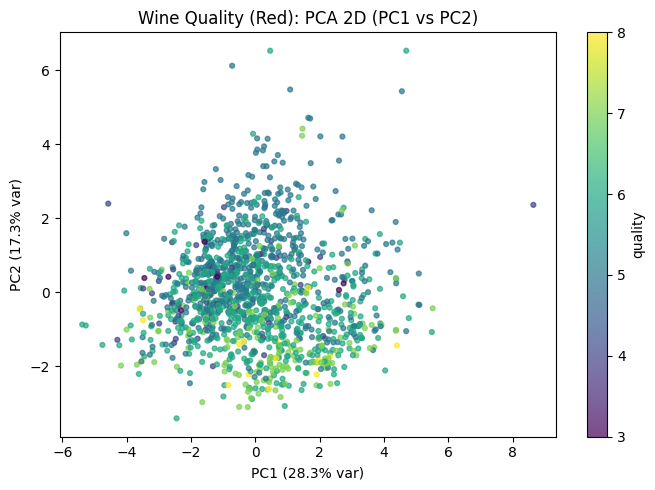

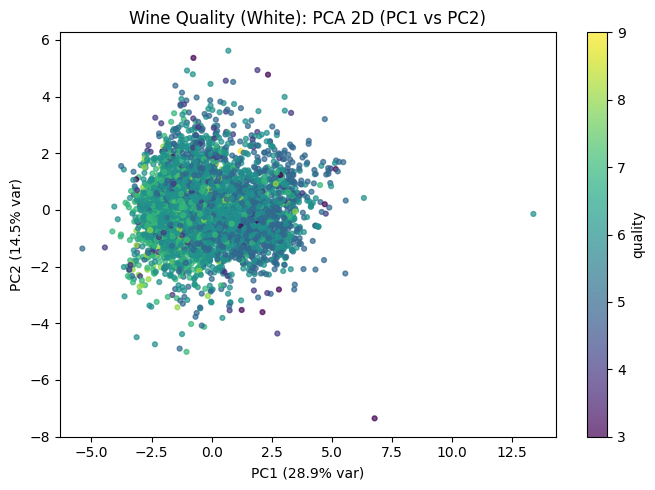

In [ ]:
'''REPORT
For each wine dataset we projected the standardized features onto the first two principal components and visualized the resulting scores in a 
2D scatter plot, with points coloured by the wine quality. In the red-wine data, PC1 and PC2 together explain about 45.6% of the total variance, 
so the plot provides a partial but meaningful view of the main structure. The points form a single dense cloud centred near the origin with a 
few clear outliers along both axes, indicating one dominant population of wines with some atypical samples, rather than well-separated clusters. 
The colour scale for quality is fairly mixed across the whole cloud, without a strong gradient along either PC1 or PC2, suggesting that wine quality
is not strongly aligned with the two largest variance directions and may instead depend on more subtle (higher-order or non-linear) combinations of 
the original physicochemical variables. A similar pattern is observed for the white-wine dataset.
In your PCA scatter plot:
    X-axis = PC1 (28.3% var)
    Y-axis = PC2 (17.3% var)
    Numbers on those axes (-5, 0, 3, etc.) are coordinates of each wine in the new PCA space, not original features like alcohol or acidity.
'''

'''
visualize PC1 vs PC2 because it is the fastest way to see the “main structure” of high-dimensional data in a human-readable plot
HOW to analyze it 
    How much of the dataset you're actually seeing (variance explained)
    The structure of the samples (clusters, spread, outliers)
    Whether quality aligns with the main structure (color gradient / separation)
'''
import matplotlib.pyplot as plt

def plot_pca_2d(df, title, label_col="quality", point_size=12, alpha=0.7):
    X = df.drop(columns=[label_col])
    y = df[label_col]

    # Standardize (mean 0, std 1 per feature) 
    X_scaled = StandardScaler().fit_transform(X)

    # PCA to 2D (PC1, PC2) 
    pca = PCA(n_components=2, random_state=0)
    Z = pca.fit_transform(X_scaled)
    evr = pca.explained_variance_ratio_

    plt.figure(figsize=(7, 5))
    sc = plt.scatter(Z[:, 0], Z[:, 1], c=y, s=point_size, alpha=alpha)
    plt.xlabel(f"PC1 ({evr[0]*100:.1f}% var)")
    plt.ylabel(f"PC2 ({evr[1]*100:.1f}% var)")
    plt.title(title)

    # Colorbar helps interpret mapping from color to y values
    plt.colorbar(sc, label="quality")
    plt.tight_layout()
    plt.show()

plot_pca_2d(df_red, "Wine Quality (Red): PCA 2D (PC1 vs PC2)")
plot_pca_2d(df_white, "Wine Quality (White): PCA 2D (PC1 vs PC2)")


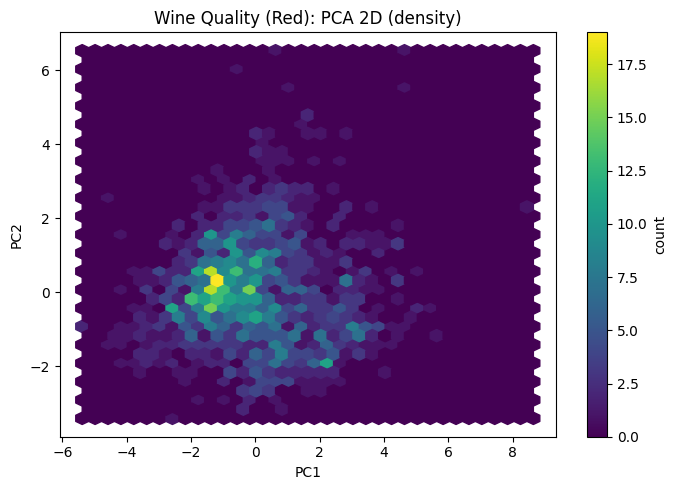

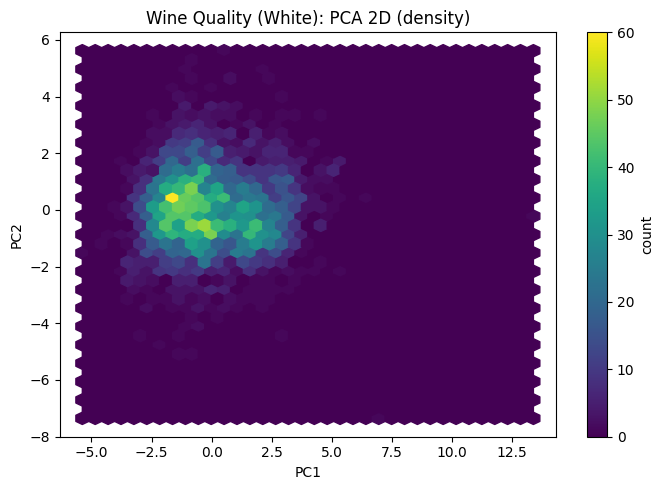

In [17]:
# need further understanding, also need for quality pattern !
'''useful for EDA when your PCA scatter plot is too crowded
So the density plot helps you answer questions like:
    Where is the main mass of the data in PC space?
    Are there multiple dense clusters or just one blob?
    Are there outliers far from dense regions?
    Which parts of PC space tend to have higher quality?
'''

def plot_pca_2d_density(df, title, label_col="quality"):
    X = df.drop(columns=[label_col])
    X_scaled = StandardScaler().fit_transform(X)
    Z = PCA(n_components=2, random_state=0).fit_transform(X_scaled)

    plt.figure(figsize=(7, 5))
    plt.hexbin(Z[:, 0], Z[:, 1], gridsize=35)  # uses default colormap
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title + " (density)")
    plt.colorbar(label="count")  
    plt.tight_layout()
    plt.show()

plot_pca_2d_density(df_red, "Wine Quality (Red): PCA 2D")
plot_pca_2d_density(df_white, "Wine Quality (White): PCA 2D")
